# TRANSFER LEARNING  ON DEVANAGARI DATASET (  BY VGG16 PRETRAINED ON IMAGENET DATASET)

In [1]:
import cv2
import numpy as np
import os
import cv2
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras import initializers

Using TensorFlow backend.


In [2]:
import time
trainx=[]
trainy=[]
diction={}
starttime=time.time()
directory='./DevanagariHandwrittenCharacterDataset/Train'
for index,folder in enumerate(os.listdir(directory)):
    diction[folder]=index
    directoryss = './DevanagariHandwrittenCharacterDataset/Train/'+folder
    for file in os.listdir(directoryss):
        img = cv2.imread(os.path.join(directoryss, file))
        trainx.append(img)
        trainy.append(index) 
    index=index+1   
endtime=time.time()
print("the time took is ",endtime-starttime," seconds")
    

the time took is  71.45630288124084  seconds


In [3]:
import time
testx=[]
testy=[]
starttime=time.time()
directory='./DevanagariHandwrittenCharacterDataset/Test'
for index,folder in enumerate(os.listdir(directory)):
    directoryss = './DevanagariHandwrittenCharacterDataset/Test/'+folder
    for file in os.listdir(directoryss):
        img = cv2.imread(os.path.join(directoryss, file))
        testx.append(img)
        testy.append(index) 
    index=index+1   
endtime=time.time()
print("the time took is ",endtime-starttime," seconds")    

the time took is  18.1514310836792  seconds


In [4]:
print(diction)

{'character_10_yna': 0, 'character_11_taamatar': 1, 'character_12_thaa': 2, 'character_13_daa': 3, 'character_14_dhaa': 4, 'character_15_adna': 5, 'character_16_tabala': 6, 'character_17_tha': 7, 'character_18_da': 8, 'character_19_dha': 9, 'character_1_ka': 10, 'character_20_na': 11, 'character_21_pa': 12, 'character_22_pha': 13, 'character_23_ba': 14, 'character_24_bha': 15, 'character_25_ma': 16, 'character_26_yaw': 17, 'character_27_ra': 18, 'character_28_la': 19, 'character_29_waw': 20, 'character_2_kha': 21, 'character_30_motosaw': 22, 'character_31_petchiryakha': 23, 'character_32_patalosaw': 24, 'character_33_ha': 25, 'character_34_chhya': 26, 'character_35_tra': 27, 'character_36_gya': 28, 'character_3_ga': 29, 'character_4_gha': 30, 'character_5_kna': 31, 'character_6_cha': 32, 'character_7_chha': 33, 'character_8_ja': 34, 'character_9_jha': 35, 'digit_0': 36, 'digit_1': 37, 'digit_2': 38, 'digit_3': 39, 'digit_4': 40, 'digit_5': 41, 'digit_6': 42, 'digit_7': 43, 'digit_8': 4

In [5]:
trainx=np.array(trainx)
trainy=np.array(trainy)
testx=np.array(testx)
testy=np.array(testy)

In [6]:
trainx = trainx.astype('float32')
testx  = testx.astype('float32')

In [7]:
trainx=trainx/255
testx=testx/255

In [8]:
trainy=trainy.reshape(-1,1)
testy=testy.reshape(-1,1)

In [9]:
#converting to categorical values
import keras
y_train = keras.utils.to_categorical(trainy, 46)
y_test = keras.utils.to_categorical(testy, 46)

# removing top layers and adding my own layers  and making last four layers trainable

In [10]:
import keras.backend as K
K.set_image_dim_ordering('tf')
from keras.applications.vgg16 import VGG16
from keras.layers import Input
from keras.models import Model
#load vgg model from keras
vgg_16_model = VGG16(weights='imagenet',include_top=False,input_shape=(32,32,3))
vgg_16_model.summary()
print(len(vgg_16_model.layers))

inputs = Input(shape = (32,32,3), name = "image_input")
#create dummy layer
output_vgg16_model = vgg_16_model(inputs)
#Add the fully-connected layers 
x = Flatten(name='flatten')(output_vgg16_model)
x = Dense(1024, activation='relu', name='fc1')(x)
x = Dropout(0.5)(x)
x = Dense(46, activation='softmax', name='predictions')(x)
#Create custom model
character_vgg = Model(inputs=inputs, outputs=x)
character_vgg.summary()
#making last 4 layers trainable
for layer in character_vgg.layers[:-4]:
      layer.trainable = False
    
print(len(character_vgg.layers))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [11]:
character_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
batch_size = 500
epochs = 15
starttime=time.time()
filepath="weightsbest.hdf5"
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history =character_vgg.fit(trainx, y_train, batch_size=batch_size,callbacks=callbacks_list,epochs=epochs, verbose=2, validation_data=(testx, y_test))
print("the time took is ",time.time()-starttime," seconds")

Train on 78200 samples, validate on 13800 samples
Epoch 1/15
 - 1831s - loss: 1.8864 - acc: 0.5060 - val_loss: 0.9987 - val_acc: 0.7528

Epoch 00001: val_acc improved from -inf to 0.75283, saving model to weightsbest.hdf5
Epoch 2/15
 - 1869s - loss: 0.9100 - acc: 0.7481 - val_loss: 0.6675 - val_acc: 0.8270

Epoch 00002: val_acc improved from 0.75283 to 0.82703, saving model to weightsbest.hdf5
Epoch 3/15
 - 1878s - loss: 0.6878 - acc: 0.8059 - val_loss: 0.5463 - val_acc: 0.8507

Epoch 00003: val_acc improved from 0.82703 to 0.85065, saving model to weightsbest.hdf5
Epoch 4/15
 - 2038s - loss: 0.5791 - acc: 0.8343 - val_loss: 0.4633 - val_acc: 0.8707

Epoch 00004: val_acc improved from 0.85065 to 0.87072, saving model to weightsbest.hdf5
Epoch 5/15
 - 2085s - loss: 0.5100 - acc: 0.8513 - val_loss: 0.4183 - val_acc: 0.8822

Epoch 00005: val_acc improved from 0.87072 to 0.88217, saving model to weightsbest.hdf5
Epoch 6/15
 - 2261s - loss: 0.4592 - acc: 0.8670 - val_loss: 0.3783 - val_acc:

In [13]:
scores = character_vgg.evaluate(testx, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 92.41%


# plotting validation vs train accuracy

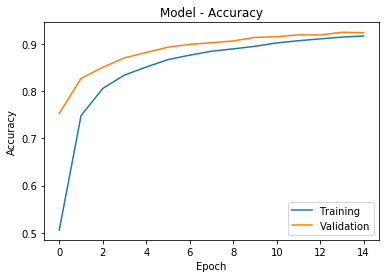

In [15]:
import matplotlib.pyplot as plt
fig1,ax_acc = plt.subplots()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

# it is neither overfitting nor underfitting as training accuracy follows same path as validation accuracy